## Split Liver Samples

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

import anndata as ad
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import matplotlib.colors

/sw/auto/rocky8c/epyc3/software/Miniconda3/4.12.0/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Cell Segmenation Data

In [3]:
D3 = sc.read_h5ad("/scratch/project/stseq/Andrew_C/STOmics/Liver/051.cellcluster/SS200001063BR_D3.cell.cluster.h5ad")
E2 = sc.read_h5ad("/scratch/project/stseq/Andrew_C/STOmics/Liver/E2/051.cellcluster/SS200001063BR_E2.cell.cluster.h5ad")
D5 = sc.read_h5ad("/scratch/project/stseq/Andrew_C/STOmics/Liver/D5/051.cellcluster/SS200001063BR_D5.cell.cluster.h5ad")

In [4]:
D3.obs['sample'] = ["2" if (row['y'] > (24600-9600)/(8200-15000)*row['x'] + (24600-9600)/(8200-15000)*(-15000)+9600) else 
                          "1" if (row['y'] < (24100-9100)/(8200-15000)*row['x'] + (24100-9100)/(8200-15000)*(-15000)+9100) else "3" for index, row in D3.obs.iterrows()]
D3.obs['sample'] = ["2" if (row['x'] < 0 or row['x'] > 114000) and row['sample'] == "3" and (row['y'] > (24200-9700)/(8200-15000)*row['x'] + (24200-9700)/(8200-15000)*(-15000)+9700) else
                          "1" if (row['x'] < 0 or row['x'] > 114000) and  row['sample'] == "3" and (row['y'] < (24200-9700)/(8200-15000)*row['x'] + (24200-9700)/(8200-15000)*(-15000)+9700) else 
                          row['sample'] for index, row in D3.obs.iterrows()]




E2.obs['sample'] = ["1" if (row['y'] > (18300-9100)/(9500-20000)*row['x'] + (18300-9100)/(9500-20000)*(-20000)+9100) else 
                          "2" if (row['y'] < (18100-8900)/(9500-20000)*row['x'] + (18100-8900)/(9500-20000)*(-20000)+8900) else "3" for index, row in E2.obs.iterrows()]
E2.obs['sample'] = ["1" if row['x'] < 0 and row['sample'] == "3" and (row['y'] > (18200-9000)/(9500-20000)*row['x'] + (18200-9000)/(9500-20000)*(-20000)+9000) else
                          "2" if row['x'] < 0 and row['sample'] == "3" and (row['y'] < (18200-9000)/(9500-20000)*row['x'] + (18200-9000)/(9500-20000)*(-20000)+9000) else 
                          row['sample'] for index, row in E2.obs.iterrows()]
E2.obs['sample'] = ["3" if (row['y'] > 21700) or (row['y'] < 7300) else row['sample'] for index, row in E2.obs.iterrows()]


D5.obs['sample_3'] = ["1" if (row['y'] > (7600-14000)/(20000-9200)*row['x'] + (7600-14000)/(20000-9200)*(-9200)+14000) else "2" for index, row in D5.obs.iterrows()]
D5.obs['sample_2'] = ["1" if (row['y'] > (7500-13600)/(20000-9200)*row['x'] + (7500-13600)/(20000-9200)*(-9200)+13600) else "2" for index, row in D5.obs.iterrows()]
D5.obs['sample'] = [row['sample_2'] if row['x'] > 13000 and row['x'] < 18000 else row['sample_3'] for index, row in D5.obs.iterrows()]

In [5]:
liver = {"D3": D3, "E2":E2, "D5":D5}

/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


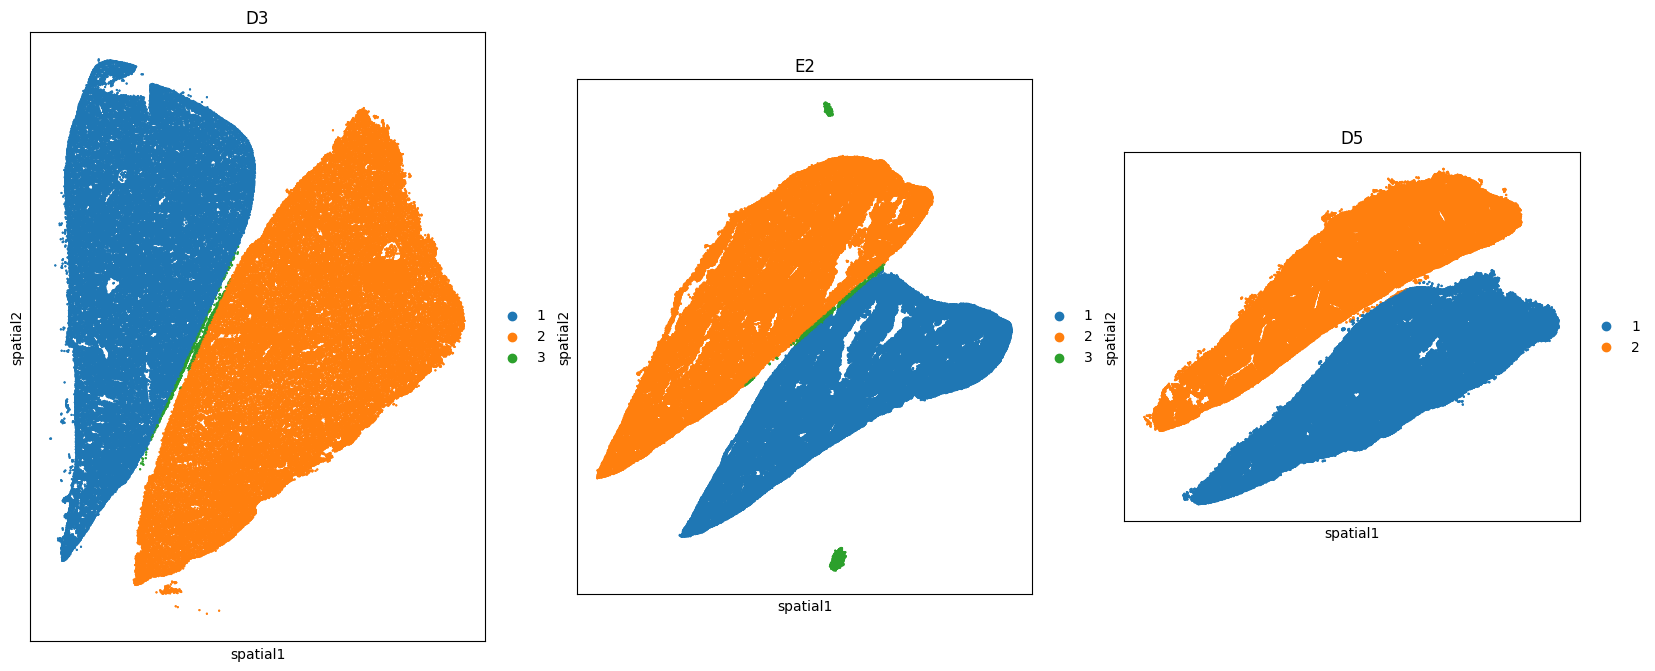

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

for idx, sample in enumerate(liver.keys()):
    
    sq.pl.spatial_scatter(
    liver[sample],
    library_id="spatial",
    shape=None,
    color=[
        "sample",
    ],
    wspace=0.4, title=sample,
        ax=axes[idx]
    )

/home/uqacause/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatte

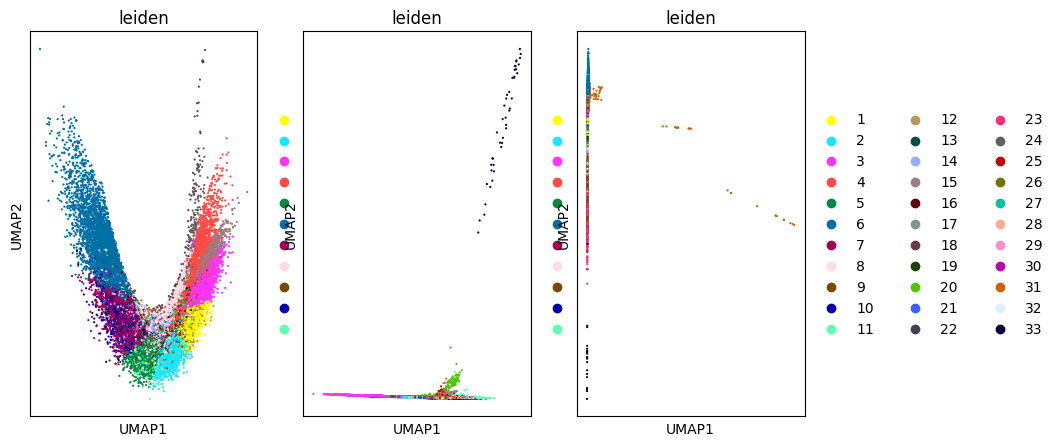

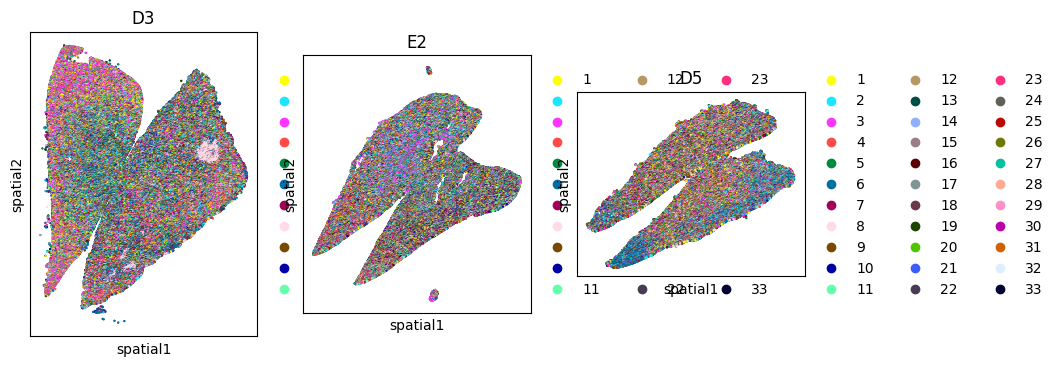

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
fig2, axes2 = plt.subplots(1, 3, figsize=(10, 5))

for idx, sample in enumerate(liver.keys()):
    sc.pl.umap(liver[sample], color="leiden", size=10,  ax=axes[idx], show=False)
    
    sq.pl.spatial_scatter(
    liver[sample],
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4, title=sample,
        ax=axes2[idx]
    )


In [8]:
liver_samples = {}

for idx, sample in enumerate(liver.keys()):
    liver_samples[str(sample)+"_Young"] = liver[sample][liver[sample].obs["sample"] == "1",:]
    liver_samples[str(sample)+"_Aged"] = liver[sample][liver[sample].obs["sample"] == "2",:]


In [9]:
liver_samples

{'D3_Young': View of AnnData object with n_obs × n_vars = 48290 × 35079
     obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'orig.ident', 'x', 'y', 'sample'
     var: 'n_cells', 'n_counts', 'mean_umi', 'hvgs', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
     uns: 'gene_exp_cluster@gene_exp_leiden', 'hvg', 'neighbors', 'sn', 'sample_colors', 'leiden_colors'
     obsm: 'X_pca', 'X_umap', 'spatial'
     obsp: 'connectivities', 'distances',
 'D3_Aged': View of AnnData object with n_obs × n_vars = 54152 × 35079
     obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'orig.ident', 'x', 'y', 'sample'
     var: 'n_cells', 'n_counts', 'mean_umi', 'hvgs', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
     uns: 'gene_exp_cluster@gene_exp_leiden', 'hvg', 'neighbors', 'sn', 'sample_colors', 'leiden_colors'
     obsm: 'X_pca', 'X_umap', 'spatial'
     obsp: 'connectivities', 'distances',
 'E2_Young': View of AnnData object wit

/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


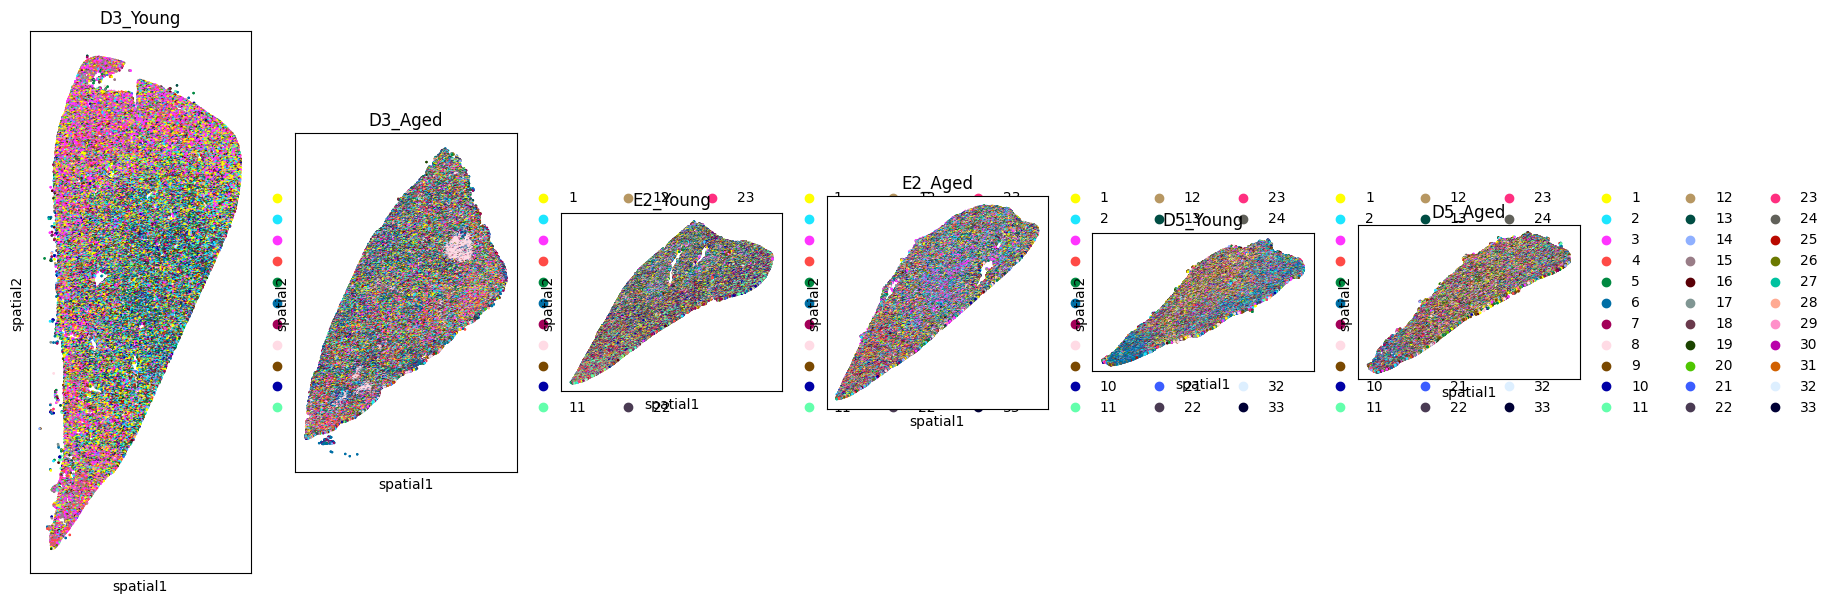

In [11]:
fig, axes = plt.subplots(1, 6, figsize=(20, 10))

for idx, sample in enumerate(liver_samples.keys()):
    
    sq.pl.spatial_scatter(
    liver_samples[sample],
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4, title=sample,
        ax=axes[idx]
    )

In [12]:
for sample in liver_samples.keys():
    
    core_data_copy = liver_samples[sample].copy()
    core_data_copy.X = core_data_copy.raw.X
    del core_data_copy.raw
    
    core_data_copy.write_h5ad("/QRISdata/Q1851/Andrew_C/STOmics/Split_Liver_Objects/cell_segmenation_"+sample+".h5ad")

In [13]:
for sample in liver.keys():
    
    core_data_copy = liver[sample].copy()
    core_data_copy.X = core_data_copy.raw.X
    del core_data_copy.raw
    
    core_data_copy.write_h5ad("/QRISdata/Q1851/Andrew_C/STOmics/Split_Liver_Objects/cell_segmenation_"+sample+".h5ad")




## Cell Cluster Data

In [11]:
D3 = sc.read_h5ad("/scratch/project/stseq/Andrew_C/STOmics/Liver/05.spatialcluster/SS200001063BR_D3.spatial.cluster.h5ad")
E2 = sc.read_h5ad("/scratch/project/stseq/Andrew_C/STOmics/Liver/E2/05.spatialcluster/SS200001063BR_E2.spatial.cluster.h5ad")
D5 = sc.read_h5ad("/scratch/project/stseq/Andrew_C/STOmics/Liver/D5/05.spatialcluster/SS200001063BR_D5.spatial.cluster.h5ad")

In [12]:
D3.obs['sample'] = ["2" if (row['y'] > (24600-9600)/(8200-15000)*row['x'] + (24600-9600)/(8200-15000)*(-15000)+9600) else 
                          "1" if (row['y'] < (24100-9100)/(8200-15000)*row['x'] + (24100-9100)/(8200-15000)*(-15000)+9100) else "3" for index, row in D3.obs.iterrows()]
D3.obs['sample'] = ["2" if (row['x'] < 0 or row['x'] > 114000) and row['sample'] == "3" and (row['y'] > (24200-9700)/(8200-15000)*row['x'] + (24200-9700)/(8200-15000)*(-15000)+9700) else
                          "1" if (row['x'] < 0 or row['x'] > 114000) and  row['sample'] == "3" and (row['y'] < (24200-9700)/(8200-15000)*row['x'] + (24200-9700)/(8200-15000)*(-15000)+9700) else 
                          row['sample'] for index, row in D3.obs.iterrows()]




E2.obs['sample'] = ["1" if (row['y'] > (18300-9100)/(9500-20000)*row['x'] + (18300-9100)/(9500-20000)*(-20000)+9100) else 
                          "2" if (row['y'] < (18100-8900)/(9500-20000)*row['x'] + (18100-8900)/(9500-20000)*(-20000)+8900) else "3" for index, row in E2.obs.iterrows()]
E2.obs['sample'] = ["1" if row['x'] < 0 and row['sample'] == "3" and (row['y'] > (18200-9000)/(9500-20000)*row['x'] + (18200-9000)/(9500-20000)*(-20000)+9000) else
                          "2" if row['x'] < 0 and row['sample'] == "3" and (row['y'] < (18200-9000)/(9500-20000)*row['x'] + (18200-9000)/(9500-20000)*(-20000)+9000) else 
                          row['sample'] for index, row in E2.obs.iterrows()]
E2.obs['sample'] = ["3" if (row['y'] > 21700) or (row['y'] < 7300) else row['sample'] for index, row in E2.obs.iterrows()]


D5.obs['sample_3'] = ["1" if (row['y'] > (7600-14000)/(20000-9200)*row['x'] + (7600-14000)/(20000-9200)*(-9200)+14000) else "2" for index, row in D5.obs.iterrows()]
D5.obs['sample_2'] = ["1" if (row['y'] > (7500-13600)/(20000-9200)*row['x'] + (7500-13600)/(20000-9200)*(-9200)+13600) else "2" for index, row in D5.obs.iterrows()]
D5.obs['sample'] = [row['sample_2'] if row['x'] > 13000 and row['x'] < 18000 else row['sample_3'] for index, row in D5.obs.iterrows()]

In [13]:
liver = {"D3": D3, "E2":E2, "D5":D5}

/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


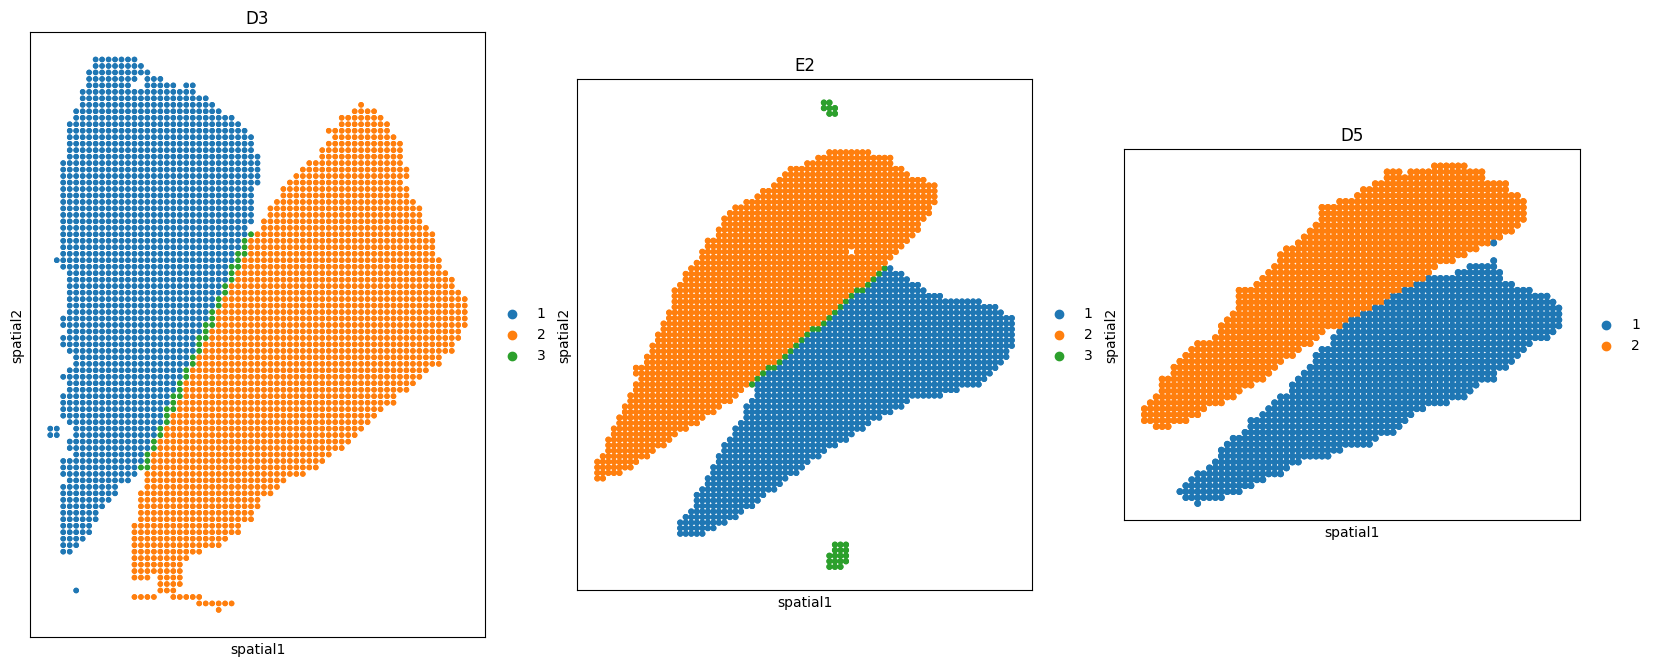

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

for idx, sample in enumerate(liver.keys()):
    
    sq.pl.spatial_scatter(
    liver[sample],
    library_id="spatial",
    shape=None,
    color=[
        "sample",
    ],
    wspace=0.4, title=sample,
        ax=axes[idx]
    )

/home/uqacause/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatte

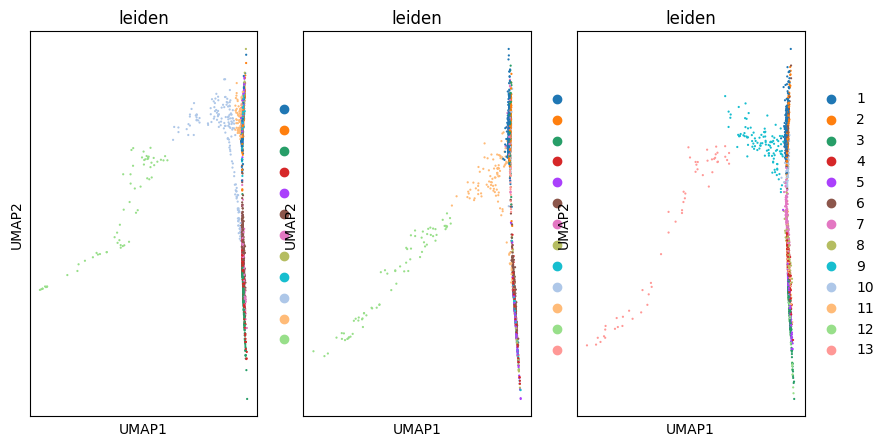

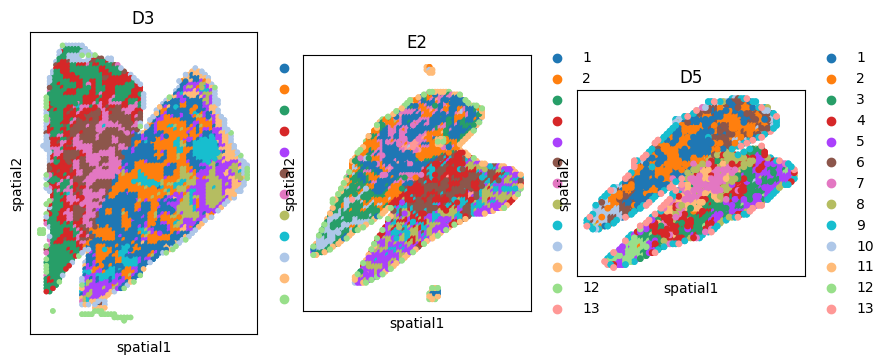

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
fig2, axes2 = plt.subplots(1, 3, figsize=(10, 5))

for idx, sample in enumerate(liver.keys()):
    sc.pl.umap(liver[sample], color="leiden", size=10,  ax=axes[idx], show=False)
    
    sq.pl.spatial_scatter(
    liver[sample],
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4, title=sample,
        ax=axes2[idx]
    )


In [18]:
liver_samples = {}

for idx, sample in enumerate(liver.keys()):
    liver_samples[str(sample)+"_Young"] = liver[sample][liver[sample].obs["sample"] == "2",:]
    liver_samples[str(sample)+"_Aged"] = liver[sample][liver[sample].obs["sample"] == "1",:]


In [19]:
liver_samples

{'D3_Young': View of AnnData object with n_obs × n_vars = 1846 × 31737
     obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'orig.ident', 'x', 'y', 'sample'
     var: 'n_cells', 'n_counts', 'mean_umi', 'hvgs', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
     uns: 'gene_exp_cluster@gene_exp_leiden', 'hvg', 'neighbors', 'sn', 'sample_colors', 'leiden_colors'
     obsm: 'X_pca', 'X_umap', 'spatial'
     obsp: 'connectivities', 'distances',
 'D3_Aged': View of AnnData object with n_obs × n_vars = 1489 × 31737
     obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'orig.ident', 'x', 'y', 'sample'
     var: 'n_cells', 'n_counts', 'mean_umi', 'hvgs', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
     uns: 'gene_exp_cluster@gene_exp_leiden', 'hvg', 'neighbors', 'sn', 'sample_colors', 'leiden_colors'
     obsm: 'X_pca', 'X_umap', 'spatial'
     obsp: 'connectivities', 'distances',
 'E2_Young': View of AnnData object with 

/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/uqacause/.local/lib/python3.8/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `

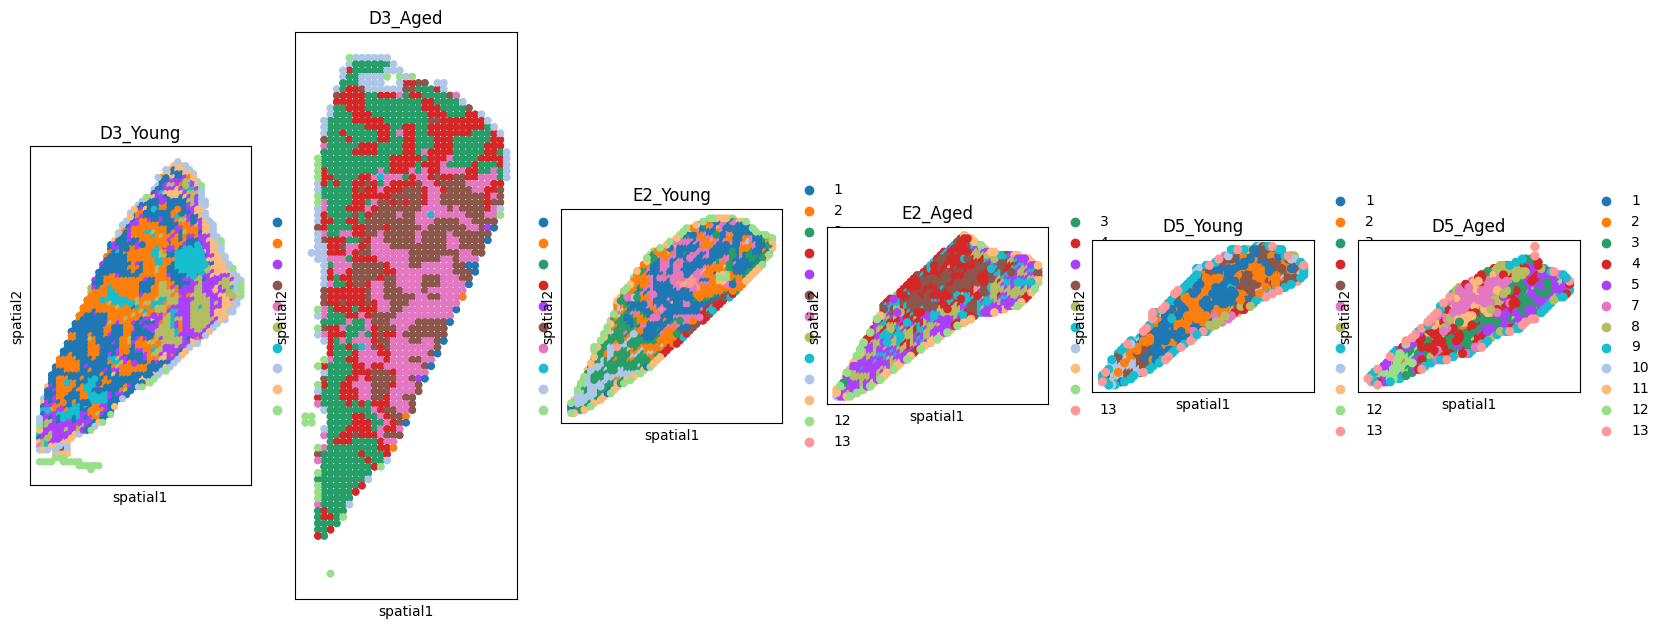

In [20]:
fig, axes = plt.subplots(1, 6, figsize=(20, 10))

for idx, sample in enumerate(liver_samples.keys()):
    
    sq.pl.spatial_scatter(
    liver_samples[sample],
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4, title=sample,
        ax=axes[idx]
    )

In [58]:
for sample in liver_samples.keys():
    
    core_data_copy = liver_samples[sample].copy()
    core_data_copy.X = core_data_copy.raw.X
    del core_data_copy.raw
    
    core_data_copy.write_h5ad("/QRISdata/Q1851/Andrew_C/STOmics/Split_Liver_Objects/cell_cluster_"+sample+".h5ad")

In [22]:
for sample in liver.keys():
    
    core_data_copy = liver[sample].copy()
    core_data_copy.X = core_data_copy.raw.X
    del core_data_copy.raw
    
    core_data_copy.write_h5ad("/QRISdata/Q1851/Andrew_C/STOmics/Split_Liver_Objects/cell_cluster_"+sample+".h5ad")